#### Dwi Pujining Tyas - PYTN-KS12-004
Python for Data Science

# CLASSIFICATION 
Bank Marketing Dataset [Assignment Python 3]

## Import Library

**Import library yang dipakai**

In [110]:
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import svm
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, recall_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KDTree
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier

### Load Data

In [4]:
df = pd.read_csv('dataset/bank-additional-full.csv', delimiter=';')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df.shape

(41188, 21)

Setelah melakukan Load Data diatas dapat dilihat data yang kita punya adalah data sebanyak 41.188 baris dan 21 kolom, yang menginformasikan promosi dari sebuah bank.

In [7]:
df.groupby('y').count()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,,,,,,,,,,,
no,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548,36548
yes,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640,4640


Data diatas adalah data dengan jumlah y disetiap kolomnya.

### Cleaning Data

In [8]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [9]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Tidak ada data yang null. Tetapi perlu dicek kembali.

In [11]:
df[df=='unknown'].count().sort_values(ascending=False)

default           8597
education         1731
housing            990
loan               990
job                330
marital             80
age                  0
poutcome             0
nr.employed          0
euribor3m            0
cons.conf.idx        0
cons.price.idx       0
emp.var.rate         0
duration             0
previous             0
pdays                0
campaign             0
day_of_week          0
month                0
contact              0
y                    0
dtype: int64

Mengecek data dengan missing value "unknown". Tertanya data yang bernilai **unknown** terdapat di beberapa kolom kategori diantaranya : **default, education, housing, loan, job, dan marital**.

In [12]:
df[df=='unknown'] = np.nan

Mengganti **unknown** menjadi Numpy NaN

In [13]:
df[df=='unknown'].count().sort_values(ascending=False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

Sudah tidak ada data yang bernilai **"unknown"**

In [14]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [15]:
df = df.drop(["pdays"],axis=1)

Menghapus kolom "pdyas" karena kolom tersebut tidak akan dipakai dalam memprediksi.

In [16]:
df_baru = df.dropna()
df_baru.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Menghapus data yang null

In [17]:
df_baru.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Sudah tidak ada data yang null

### Merename nama kolom

In [18]:
df_baru.rename(columns={
    'job':'pekerjaan',
    'marital':'pernikahan',
    'education':'pendidikan',
    'default':'default_kredit',
    'housing':'pinjaman_perumahan',
    'loan':'pinjaman_pribadi',
    'contact':'alat_komunikasi',
    'month':'kontak_terakhir_bulan',
    'day_of_week':'hari_kontak_terakhir',
    'poutcome':'luaran_marketing_sebelumnya',
    'y':'berlangganan_deposito',
    'age':'umur',
    'duration':'kontak_terakhir_berdurasi',
    'campaign':'jumlah_kontak_selama_pemasaran',
    'previous':'jumlah_kontak_sebelum_pemasaran',
    'emp.var.rate':'tingkat_variasi_pekerjaan',
    'cons.price.idx':'indeks_harga_konsumen',
    'cons.conf.idx':'indeks_kepercayaan_konsumen',
    'euribor3m':'tarif_euribor_3bulan',
    'nr.employed':'jumlah_karyawan',
},inplace=True)

/var/folders/4y/l6qtpfl57p39zc4q106yjtqw0000gp/T/ipykernel_2649/707710903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baru.rename(columns={


In [19]:
df_baru.head()

,umur,pekerjaan,pernikahan,pendidikan,default_kredit,pinjaman_perumahan,pinjaman_pribadi,alat_komunikasi,kontak_terakhir_bulan,hari_kontak_terakhir,kontak_terakhir_berdurasi,jumlah_kontak_selama_pemasaran,jumlah_kontak_sebelum_pemasaran,luaran_marketing_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,tarif_euribor_3bulan,jumlah_karyawan,berlangganan_deposito
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Correlation

In [20]:
def plot_corr(df_baru, size=25):
    corr = df_baru.corr()
    fig, ax= plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

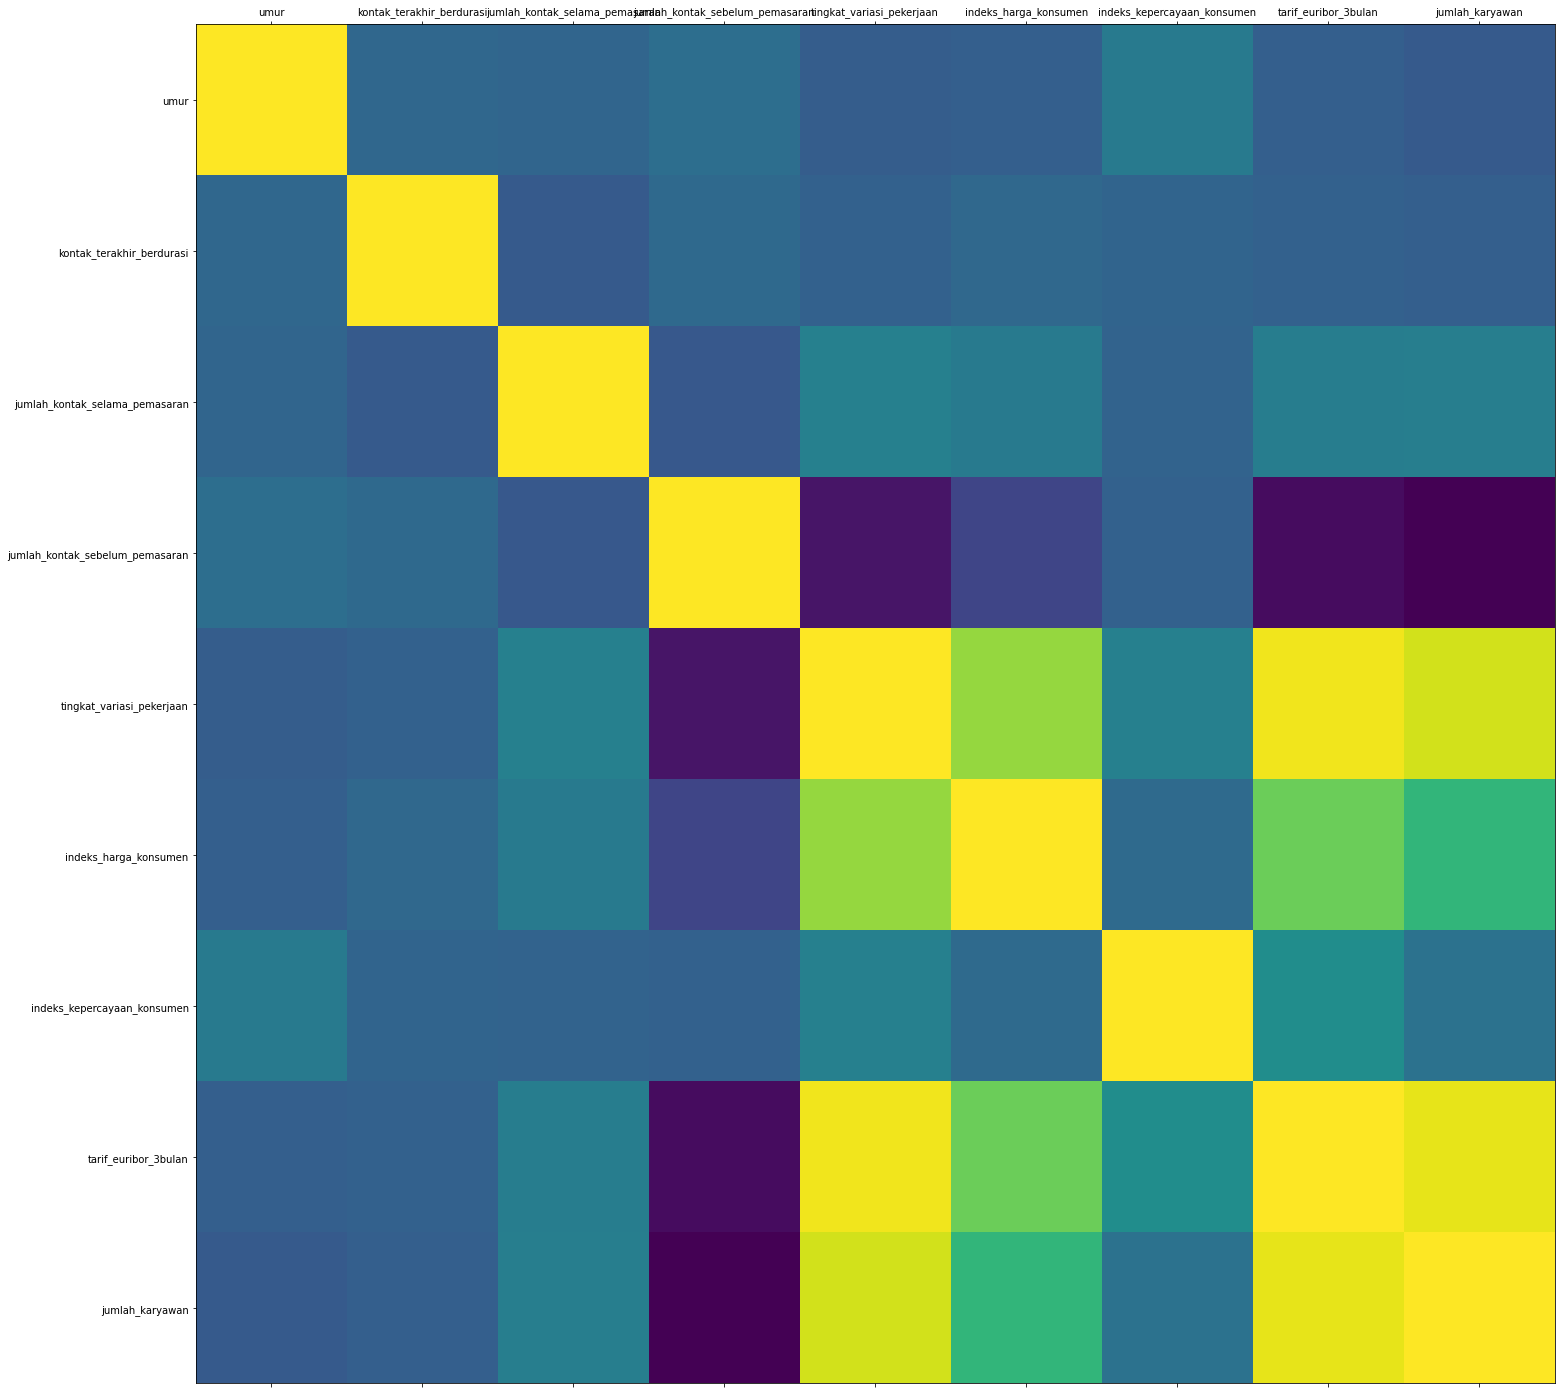

In [21]:
plot_corr(df_baru)

In [22]:
df_baru.corr()

,umur,kontak_terakhir_berdurasi,jumlah_kontak_selama_pemasaran,jumlah_kontak_sebelum_pemasaran,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,tarif_euribor_3bulan,jumlah_karyawan
umur,1.000000,0.007910,-0.002364,0.049231,-0.050409,-0.035762,0.125017,-0.036481,-0.064586
kontak_terakhir_berdurasi,0.007910,1.000000,-0.068406,0.018772,-0.023374,0.012768,-0.009525,-0.028922,-0.040367
jumlah_kontak_selama_pemasaran,-0.002364,-0.068406,1.000000,-0.080766,0.157739,0.127260,-0.011664,0.140836,0.148069
jumlah_kontak_sebelum_pemasaran,0.049231,0.018772,-0.080766,1.000000,-0.403502,-0.176775,-0.027930,-0.438863,-0.488365
tingkat_variasi_pekerjaan,-0.050409,-0.023374,0.157739,-0.403502,1.000000,0.766055,0.157593,0.969412,0.900390
indeks_harga_konsumen,-0.035762,0.012768,0.127260,-0.176775,0.766055,1.000000,0.027217,0.667292,0.488871
indeks_kepercayaan_konsumen,0.125017,-0.009525,-0.011664,-0.027930,0.157593,0.027217,1.000000,0.243637,0.075283
tarif_euribor_3bulan,-0.036481,-0.028922,0.140836,-0.438863,0.969412,0.667292,0.243637,1.000000,0.944871
jumlah_karyawan,-0.064586,-0.040367,0.148069,-0.488365,0.900390,0.488871,0.075283,0.944871,1.000000


## Visualisasi Data

In [23]:
deposito = df_baru['berlangganan_deposito'].value_counts()
deposito

no     26629
yes     3859
Name: berlangganan_deposito, dtype: int64

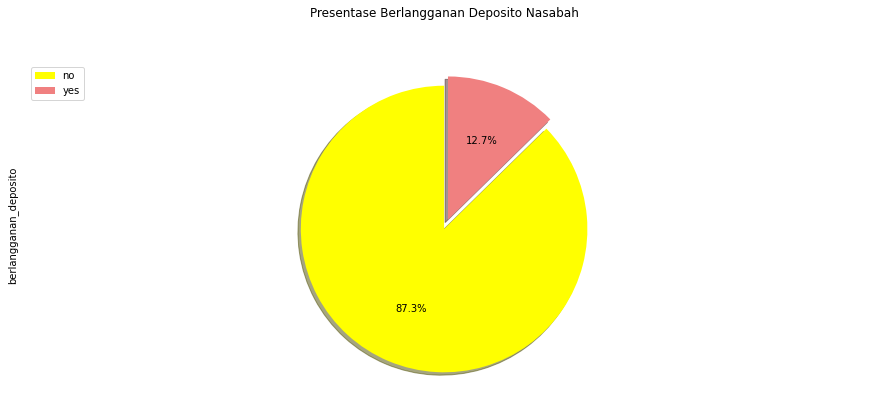

In [24]:
color_list = ["yellow", "lightcoral"]
explode_list = [0.02, 0.05]

deposito.nlargest(2).plot(
    kind='pie'
    ,figsize=(15,6)
    ,autopct='%1.1f%%'
    ,startangle=90
    ,shadow=True
    ,labels=None
    ,explode=explode_list
    ,colors=color_list
)

plt.title("Presentase Berlangganan Deposito Nasabah", y=1.12)
plt.axis('equal')
plt.legend(labels=deposito.nlargest(2).index, loc='upper left')


Dari visualisasi tersebut mengiformasikan bahwa ternyata nasabah yang tidak berlangganan lebih banyak dari pada nasabah yang berlangganan.

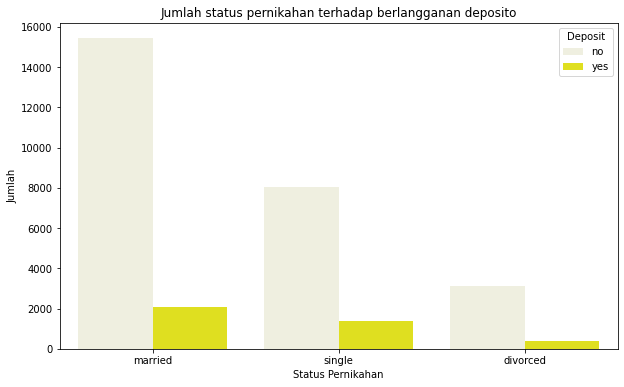

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(
    x='pernikahan',
    hue='berlangganan_deposito',
    color='yellow',
    data=df_baru
)
ax.set_title('Jumlah status pernikahan terhadap berlangganan deposito')
ax.set_ylabel('Jumlah')
ax.set_xlabel('Status Pernikahan')
ax.legend(title='Deposit')

Dilihat dari status pernikahan pun jumlah yang tidak berlangganan deposito lebih banyak di setiap kelasnya dibandingkan yang berlangganan.

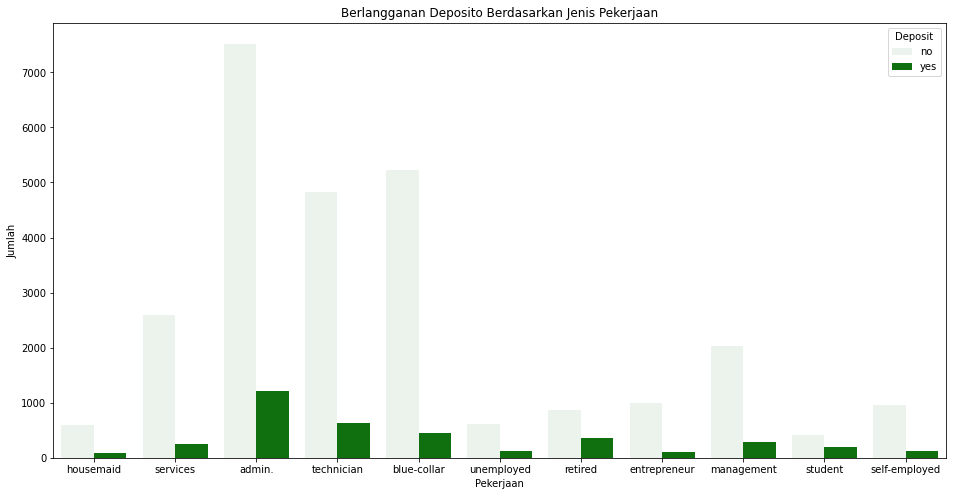

In [26]:
fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(
    x='pekerjaan',
    hue='berlangganan_deposito',
    color='green',
    data=df_baru
)
ax.set_title('Berlangganan Deposito Berdasarkan Jenis Pekerjaan')
ax.set_ylabel('Jumlah')
ax.set_xlabel('Pekerjaan')
ax.legend(title='Deposit')

Visualisasi diatas adalah menggambarkan orang yang berlangganan ataupun tidak berdasarkan jenis pekerjaan mereka.

## Data Prepocessing

In [28]:
df_baru["berlangganan_deposito"] = np.where(df_baru["berlangganan_deposito"] == "yes", 1, 0)
df_baru["berlangganan_deposito"] = df_baru["berlangganan_deposito"].astype(str)

/var/folders/4y/l6qtpfl57p39zc4q106yjtqw0000gp/T/ipykernel_2649/966853054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baru["berlangganan_deposito"] = np.where(df_baru["berlangganan_deposito"] == "yes", 1, 0)
/var/folders/4y/l6qtpfl57p39zc4q106yjtqw0000gp/T/ipykernel_2649/966853054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baru["berlangganan_deposito"] = df_baru["berlangganan_deposito"].astype(str)


Mengubah value yes dan no pada kolom 'berlangganan deposito' menjadi 1 0

In [30]:
df_baru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   umur                             30488 non-null  int64  
 1   pekerjaan                        30488 non-null  object 
 2   pernikahan                       30488 non-null  object 
 3   pendidikan                       30488 non-null  object 
 4   default_kredit                   30488 non-null  object 
 5   pinjaman_perumahan               30488 non-null  object 
 6   pinjaman_pribadi                 30488 non-null  object 
 7   alat_komunikasi                  30488 non-null  object 
 8   kontak_terakhir_bulan            30488 non-null  object 
 9   hari_kontak_terakhir             30488 non-null  object 
 10  kontak_terakhir_berdurasi        30488 non-null  int64  
 11  jumlah_kontak_selama_pemasaran   30488 non-null  int64  
 12  jumlah_kontak_sebe

In [31]:
df_baru.isnull().sum()

umur                               0
pekerjaan                          0
pernikahan                         0
pendidikan                         0
default_kredit                     0
pinjaman_perumahan                 0
pinjaman_pribadi                   0
alat_komunikasi                    0
kontak_terakhir_bulan              0
hari_kontak_terakhir               0
kontak_terakhir_berdurasi          0
jumlah_kontak_selama_pemasaran     0
jumlah_kontak_sebelum_pemasaran    0
luaran_marketing_sebelumnya        0
tingkat_variasi_pekerjaan          0
indeks_harga_konsumen              0
indeks_kepercayaan_konsumen        0
tarif_euribor_3bulan               0
jumlah_karyawan                    0
berlangganan_deposito              0
dtype: int64

In [32]:
Q1 = df_baru.quantile(0.25)
Q3 = df_baru.quantile(0.75)
IQR = Q3 - Q1
IQR

umur                                14.000
kontak_terakhir_berdurasi          218.000
jumlah_kontak_selama_pemasaran       2.000
jumlah_kontak_sebelum_pemasaran      0.000
tingkat_variasi_pekerjaan            3.200
indeks_harga_konsumen                0.919
indeks_kepercayaan_konsumen          6.300
tarif_euribor_3bulan                 3.648
jumlah_karyawan                    129.000
dtype: float64

Mengetahui ukuran variabilitas data

In [34]:
df_baru["berlangganan_deposito"].value_counts()

0    26629
1     3859
Name: berlangganan_deposito, dtype: int64

Mengetahui total jumlah dari yang berlangganan dan tidak berlangganan

In [35]:
df_baru = df_baru[~(((df_baru < (Q1 - 1.5 * IQR)) |( df_baru > (Q3 + 1.5 * IQR))).any(axis=1))]

/var/folders/4y/l6qtpfl57p39zc4q106yjtqw0000gp/T/ipykernel_2649/2916407081.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_baru = df_baru[~(((df_baru < (Q1 - 1.5 * IQR)) |( df_baru > (Q3 + 1.5 * IQR))).any(axis=1))]


Menghapus outlier di quartil dataframe

In [36]:
df_baru.shape

(22044, 20)

In [39]:
col_list = list(df_baru.columns)
col_list

['umur',
 'pekerjaan',
 'pernikahan',
 'pendidikan',
 'default_kredit',
 'pinjaman_perumahan',
 'pinjaman_pribadi',
 'alat_komunikasi',
 'kontak_terakhir_bulan',
 'hari_kontak_terakhir',
 'kontak_terakhir_berdurasi',
 'jumlah_kontak_selama_pemasaran',
 'jumlah_kontak_sebelum_pemasaran',
 'luaran_marketing_sebelumnya',
 'tingkat_variasi_pekerjaan',
 'indeks_harga_konsumen',
 'indeks_kepercayaan_konsumen',
 'tarif_euribor_3bulan',
 'jumlah_karyawan',
 'berlangganan_deposito']

Mengubah data frame yang sebelumnya menjadi sebuah list

In [40]:
col_list.remove("berlangganan_deposito")

Menghapus kolom berlangganan_deposito di list yang sudah dibuat, karena tidak memerlukan kolom tersebut dan akan membuat prediksi mengenai itu

In [41]:
for col in col_list:
    if df_baru[col].dtypes == "object":
        df_baru[col] = df_baru[col].fillna(df_baru[col].mode()[0])
    else:
        df_baru[col] = df_baru[col].fillna(df_baru[col].mean())

/var/folders/4y/l6qtpfl57p39zc4q106yjtqw0000gp/T/ipykernel_2649/2846832833.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baru[col] = df_baru[col].fillna(df_baru[col].mean())
/var/folders/4y/l6qtpfl57p39zc4q106yjtqw0000gp/T/ipykernel_2649/2846832833.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_baru[col] = df_baru[col].fillna(df_baru[col].mode()[0])
/var/folders/4y/l6qtpfl57p39zc4q106yjtqw0000gp/T/ipykernel_2649/2846832833.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy

Mengubah null pada data list dengan nilai yang paling banyak muncul dan rata-rata dari data tersebut

In [52]:
df_baru.isna().sum()

umur                               0
pekerjaan                          0
pernikahan                         0
pendidikan                         0
default_kredit                     0
pinjaman_perumahan                 0
pinjaman_pribadi                   0
alat_komunikasi                    0
kontak_terakhir_bulan              0
hari_kontak_terakhir               0
kontak_terakhir_berdurasi          0
jumlah_kontak_selama_pemasaran     0
jumlah_kontak_sebelum_pemasaran    0
luaran_marketing_sebelumnya        0
tingkat_variasi_pekerjaan          0
indeks_harga_konsumen              0
indeks_kepercayaan_konsumen        0
tarif_euribor_3bulan               0
jumlah_karyawan                    0
berlangganan_deposito              0
dtype: int64

In [59]:
bins = [0, 1, 5, 10, 25, 50, 100]
df_baru['umur'] = pd.cut(df_baru['umur'].apply(lambda x: x.left), bins)
df_baru['umur'] = df_baru.umur.astype(str)

Membagi data umur ke beberapa kelompok dengan perbandingan antar beberapa bilangan bulat dan interval pandas

In [61]:
df_baru.tail()

,umur,pekerjaan,pernikahan,pendidikan,default_kredit,pinjaman_perumahan,pinjaman_pribadi,alat_komunikasi,kontak_terakhir_bulan,hari_kontak_terakhir,kontak_terakhir_berdurasi,jumlah_kontak_selama_pemasaran,jumlah_kontak_sebelum_pemasaran,luaran_marketing_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,tarif_euribor_3bulan,jumlah_karyawan,berlangganan_deposito
41180,"(10, 25]",admin.,married,university.degree,no,no,no,cellular,nov,fri,254,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41181,"(10, 25]",admin.,married,university.degree,no,yes,no,cellular,nov,fri,281,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,"(10, 25]",blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,"(25, 50]",retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,"(10, 25]",technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [62]:
labelencoder = LabelEncoder()
for i in col_list:
    df_baru[i] = labelencoder.fit_transform(df_baru[i])

In [63]:
df_baru

,umur,pekerjaan,pernikahan,pendidikan,default_kredit,pinjaman_perumahan,pinjaman_pribadi,alat_komunikasi,kontak_terakhir_bulan,hari_kontak_terakhir,kontak_terakhir_berdurasi,jumlah_kontak_selama_pemasaran,jumlah_kontak_sebelum_pemasaran,luaran_marketing_sebelumnya,tingkat_variasi_pekerjaan,indeks_harga_konsumen,indeks_kepercayaan_konsumen,tarif_euribor_3bulan,jumlah_karyawan,berlangganan_deposito
0,1,3,1,0,0,0,0,1,6,1,261,0,0,0,8,17,16,269,8,0
2,0,7,1,3,0,1,0,1,6,1,226,0,0,0,8,17,16,269,8,0
3,0,0,1,1,0,0,0,1,6,1,151,0,0,0,8,17,16,269,8,0
4,1,7,1,3,0,0,1,1,6,1,307,0,0,0,8,17,16,269,8,0
6,1,0,1,5,0,0,0,1,6,1,139,0,0,0,8,17,16,269,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,0,0,1,6,0,0,0,0,7,0,254,1,0,0,5,24,0,156,0,0
41181,0,0,1,6,0,1,0,0,7,0,281,0,0,0,5,24,0,156,0,1
41184,0,1,1,5,0,0,0,0,7,0,383,0,0,0,5,24,0,156,0,0
41185,1,5,1,6,0,1,0,0,7,0,189,1,0,0,5,24,0,156,0,0


Mengubah nilai kategorikal menjadi numerik dengan encoder untuk pemodelan machine learning

In [67]:
col_list = []
for col in df_baru.columns:
    if (( df_baru[col].dtype != "object") & (col != "y")):
        col_list.append(col)
    
X = df_baru[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range (len(X.columns))]
vif_data

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,feature,VIF
0,umur,1.200797
1,pekerjaan,2.066125
2,pernikahan,4.614116
3,pendidikan,4.959805
4,default_kredit,1.000821
5,pinjaman_perumahan,2.157205
6,pinjaman_pribadi,1.187667
7,alat_komunikasi,3.570883
8,kontak_terakhir_bulan,4.558865
9,hari_kontak_terakhir,3.080925


Memeriksa multikolinearitas antara variabel-variabel independen

In [68]:
df_baru = df_baru.drop(["umur", "jumlah_kontak_sebelum_pemasaran", "luaran_marketing_sebelumnya", "tingkat_variasi_pekerjaan", "indeks_harga_konsumen", "tarif_euribor_3bulan", "jumlah_karyawan"], axis = 1)

Menghapus beberapa kolom yang tidak dipakai dalam pemodelan

In [69]:
df_baru

,pekerjaan,pernikahan,pendidikan,default_kredit,pinjaman_perumahan,pinjaman_pribadi,alat_komunikasi,kontak_terakhir_bulan,hari_kontak_terakhir,kontak_terakhir_berdurasi,jumlah_kontak_selama_pemasaran,indeks_kepercayaan_konsumen,berlangganan_deposito
0,3,1,0,0,0,0,1,6,1,261,0,16,0
2,7,1,3,0,1,0,1,6,1,226,0,16,0
3,0,1,1,0,0,0,1,6,1,151,0,16,0
4,7,1,3,0,0,1,1,6,1,307,0,16,0
6,0,1,5,0,0,0,1,6,1,139,0,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,0,1,6,0,0,0,0,7,0,254,1,0,0
41181,0,1,6,0,1,0,0,7,0,281,0,0,1
41184,1,1,5,0,0,0,0,7,0,383,0,0,0
41185,5,1,6,0,1,0,0,7,0,189,1,0,0


In [70]:
col_list = []
for col in df_baru.columns:
    if (( df_baru[col].dtype != "object") & (col != "y")):
        col_list.append(col)
    
X = df_baru[col_list]
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range (len(X.columns))]
vif_data

,feature,VIF
0,pekerjaan,2.012178
1,pernikahan,4.052373
2,pendidikan,4.439309
3,default_kredit,1.000752
4,pinjaman_perumahan,2.064761
5,pinjaman_pribadi,1.180533
6,alat_komunikasi,2.076130
7,kontak_terakhir_bulan,4.023897
8,hari_kontak_terakhir,2.859595
9,kontak_terakhir_berdurasi,2.829592


Karena vif sebelumnya terdapat NaN dan juga menghapus beberapa kolom yang tidak terpakai, maka perlu memeriksa ulang multikolinearitas antara variabel-variabel independen tersebut

In [71]:
vif_data.feature

0                          pekerjaan
1                         pernikahan
2                         pendidikan
3                     default_kredit
4                 pinjaman_perumahan
5                   pinjaman_pribadi
6                    alat_komunikasi
7              kontak_terakhir_bulan
8               hari_kontak_terakhir
9          kontak_terakhir_berdurasi
10    jumlah_kontak_selama_pemasaran
11       indeks_kepercayaan_konsumen
Name: feature, dtype: object

In [72]:
ind_features = list(vif_data.feature)
ind_features
df_ind = df_baru[ind_features]
df_ind

,pekerjaan,pernikahan,pendidikan,default_kredit,pinjaman_perumahan,pinjaman_pribadi,alat_komunikasi,kontak_terakhir_bulan,hari_kontak_terakhir,kontak_terakhir_berdurasi,jumlah_kontak_selama_pemasaran,indeks_kepercayaan_konsumen
0,3,1,0,0,0,0,1,6,1,261,0,16
2,7,1,3,0,1,0,1,6,1,226,0,16
3,0,1,1,0,0,0,1,6,1,151,0,16
4,7,1,3,0,0,1,1,6,1,307,0,16
6,0,1,5,0,0,0,1,6,1,139,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...
41180,0,1,6,0,0,0,0,7,0,254,1,0
41181,0,1,6,0,1,0,0,7,0,281,0,0
41184,1,1,5,0,0,0,0,7,0,383,0,0
41185,5,1,6,0,1,0,0,7,0,189,1,0


In [73]:
df_dep = df_baru["berlangganan_deposito"]
df_dep

0        0
2        0
3        0
4        0
6        0
        ..
41180    0
41181    1
41184    0
41185    0
41186    1
Name: berlangganan_deposito, Length: 22044, dtype: object

In [74]:
x_train, x_test, y_train, y_test = train_test_split(df_ind, df_dep, train_size= 0.75, random_state=0)

Membagi data untuk training dan testing

In [75]:
x_train

,pekerjaan,pernikahan,pendidikan,default_kredit,pinjaman_perumahan,pinjaman_pribadi,alat_komunikasi,kontak_terakhir_bulan,hari_kontak_terakhir,kontak_terakhir_berdurasi,jumlah_kontak_selama_pemasaran,indeks_kepercayaan_konsumen
37030,7,2,3,0,1,0,0,3,3,98,0,20
28251,9,1,3,0,1,1,0,0,3,376,2,3
7188,0,2,6,0,1,0,1,6,2,206,2,16
38990,1,1,3,0,0,0,0,2,1,344,0,21
7862,1,1,2,0,0,0,1,4,1,447,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...
22881,9,1,6,0,1,0,0,1,1,111,2,17
35131,1,2,2,0,1,0,0,6,0,74,1,4
17577,0,1,6,0,1,0,0,3,1,124,2,6
19288,0,1,6,0,1,1,0,1,4,68,0,17


## Classification

### Logistic Regression

In [76]:
LR = LogisticRegression()

In [77]:
LR.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
test_pred = LR.predict(x_test)

In [79]:
x = np.unique(test_pred)
x

array(['0', '1'], dtype=object)

Mengambil nilai unik

In [80]:
c1 = confusion_matrix(y_test, test_pred)
c1

array([[5125,   25],
       [ 350,   11]])

Membandingkan nilai prediksi dengan nilai yang sebenarnya pada kelas

In [82]:
from sklearn.metrics import *
accuracy_score(y_test, test_pred)

0.9319542732716385

Hasil akurasi dari model klasifikasi pengujian tersebut adalah sebesar 0.9319542732716385 atau model mampu memprediksi 93.19% data latih dengan benar

In [83]:
sen = c1[0, 0] / (c1[0, 0] + c1[0, 1])
sen

0.9951456310679612

Menghitung sensitivitas kelas pada model klasifikasi

In [84]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.96      5150
           1       0.31      0.03      0.06       361

    accuracy                           0.93      5511
   macro avg       0.62      0.51      0.51      5511
weighted avg       0.89      0.93      0.91      5511



Akurasi dari model yang sudah dibuat sebesar 0.93 

### K-Nearest Neighbors

In [85]:
df_baru.head()

,pekerjaan,pernikahan,pendidikan,default_kredit,pinjaman_perumahan,pinjaman_pribadi,alat_komunikasi,kontak_terakhir_bulan,hari_kontak_terakhir,kontak_terakhir_berdurasi,jumlah_kontak_selama_pemasaran,indeks_kepercayaan_konsumen,berlangganan_deposito
0,3,1,0,0,0,0,1,6,1,261,0,16,0
2,7,1,3,0,1,0,1,6,1,226,0,16,0
3,0,1,1,0,0,0,1,6,1,151,0,16,0
4,7,1,3,0,0,1,1,6,1,307,0,16,0
6,0,1,5,0,0,0,1,6,1,139,0,16,0


In [86]:
X = df_baru.iloc[:, [0, 1, 2,3,4,5,6,7,8,9,10,11]].values
X

array([[  3,   1,   0, ..., 261,   0,  16],
       [  7,   1,   3, ..., 226,   0,  16],
       [  0,   1,   1, ..., 151,   0,  16],
       ...,
       [  1,   1,   5, ..., 383,   0,   0],
       [  5,   1,   6, ..., 189,   1,   0],
       [  9,   1,   5, ..., 442,   0,   0]])

In [87]:
y = df_baru.iloc[:, -1].values
y

array(['0', '0', '0', ..., '0', '0', '1'], dtype=object)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

Membagi dataset menjadi data training dan data testing

In [91]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [92]:
y_pred = classifier.predict(X_test)

In [94]:
cm = confusion_matrix(y_test, y_pred)
recall= recall_score(y_test,y_pred,pos_label='positive',average='micro')
f1= f1_score(y_test,y_pred,pos_label='positive',average='micro')
ac = accuracy_score(y_test,y_pred)
print("Confussion Matrix: ",cm)
print("recall: ",recall)
print("f1: ",f1)
print("Accuration: ",ac)

Confussion Matrix:  [[4080   41]
 [ 257   31]]
recall:  0.9324109775459288
f1:  0.9324109775459288
Accuration:  0.9324109775459288


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1379: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1379: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Akurasi dari model knn sebesar 0.9324109775459288 atau model mampu memprediksi 93.24% data latih dengan benar

In [95]:
testing = df_baru.copy()
testing

,pekerjaan,pernikahan,pendidikan,default_kredit,pinjaman_perumahan,pinjaman_pribadi,alat_komunikasi,kontak_terakhir_bulan,hari_kontak_terakhir,kontak_terakhir_berdurasi,jumlah_kontak_selama_pemasaran,indeks_kepercayaan_konsumen,berlangganan_deposito
0,3,1,0,0,0,0,1,6,1,261,0,16,0
2,7,1,3,0,1,0,1,6,1,226,0,16,0
3,0,1,1,0,0,0,1,6,1,151,0,16,0
4,7,1,3,0,0,1,1,6,1,307,0,16,0
6,0,1,5,0,0,0,1,6,1,139,0,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,0,1,6,0,0,0,0,7,0,254,1,0,0
41181,0,1,6,0,1,0,0,7,0,281,0,0,1
41184,1,1,5,0,0,0,0,7,0,383,0,0,0
41185,5,1,6,0,1,0,0,7,0,189,1,0,0


Membuat data baru untuk testing model yang sudah dibuat

In [96]:
testing = testing.drop(["berlangganan_deposito"],axis=1)
testing

,pekerjaan,pernikahan,pendidikan,default_kredit,pinjaman_perumahan,pinjaman_pribadi,alat_komunikasi,kontak_terakhir_bulan,hari_kontak_terakhir,kontak_terakhir_berdurasi,jumlah_kontak_selama_pemasaran,indeks_kepercayaan_konsumen
0,3,1,0,0,0,0,1,6,1,261,0,16
2,7,1,3,0,1,0,1,6,1,226,0,16
3,0,1,1,0,0,0,1,6,1,151,0,16
4,7,1,3,0,0,1,1,6,1,307,0,16
6,0,1,5,0,0,0,1,6,1,139,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...
41180,0,1,6,0,0,0,0,7,0,254,1,0
41181,0,1,6,0,1,0,0,7,0,281,0,0
41184,1,1,5,0,0,0,0,7,0,383,0,0
41185,5,1,6,0,1,0,0,7,0,189,1,0


In [97]:
d1 = df_baru[df_baru["berlangganan_deposito"] == "1"]
d1

,pekerjaan,pernikahan,pendidikan,default_kredit,pinjaman_perumahan,pinjaman_pribadi,alat_komunikasi,kontak_terakhir_bulan,hari_kontak_terakhir,kontak_terakhir_berdurasi,jumlah_kontak_selama_pemasaran,indeks_kepercayaan_konsumen,berlangganan_deposito
1189,1,2,2,0,1,0,1,6,2,541,2,16,1
1319,0,1,6,0,0,0,1,6,2,513,0,16,1
2002,4,1,6,0,0,0,1,6,1,460,4,16,1
2305,4,1,0,0,1,1,1,6,3,568,3,16,1
2316,0,2,3,0,1,1,1,6,3,618,0,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41165,3,0,6,0,0,0,0,7,4,403,1,0,1
41171,8,1,5,0,1,0,1,7,2,112,0,0,1
41172,0,2,6,0,1,0,0,7,2,353,0,0,1
41181,0,1,6,0,1,0,0,7,0,281,0,0,1


In [98]:
X_new = np.array([testing.iloc[1319]])
# X_new = sc.fit_transform(X_new)
# Lakukan prediksi menggunakan model KNN
y_pred = classifier.predict(X_new)

# Tampilkan hasil prediksi
print("Hasil prediksi: ", y_pred)

Hasil prediksi:  ['0']


Prediksi yang dihasilkan adalah nasabah tersebut bukan target untuk menjadi nasabah berlangganan deposito

### Naive Bayes

In [105]:
X_train, X_test, y_train, y_test = train_test_split(df_baru,y ,test_size=0.3, random_state=103)

In [106]:
nbmodel = GaussianNB()
nbmodel.fit(X_train,y_train)
nbmodel.score(X_train,y_train)

1.0

In [107]:
nbmodel.score(X_test,y_test)

1.0

Akurasi dari model Naive Bayes sebesar 1.0 atau model mampu mengklasifikasi 100% data latih dengan benar

In [103]:
y_pred_prob = nbmodel.predict_proba(X_test)

In [104]:
log_loss(y_test,y_pred=y_pred_prob)

9.992007221626413e-16

Matriks probabilitas prediksi untuk setiap sampel pada data uji sebesar 9.992007221626413e-16

### Random Forest

In [108]:
X_train.shape

(15430, 13)

In [109]:
X_test.shape

(6614, 13)

In [111]:
rfmodel = RandomForestClassifier(n_estimators=100, random_state=10)

In [112]:
rfmodel.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [113]:
print("Train Score: ", rfmodel.score(X_train,y_train))
print("Test Score: ", rfmodel.score(X_test,y_test))

Train Score:  1.0
Test Score:  1.0


In [115]:
rfmodel.score(X_train,y_train)

1.0

Akurasi dari model Random Forest sebesar 1.0 atau model mampu memprediksi 100% data latih dengan benar

## Overall Analysis

- Dengan dataset yang ada, digunakan untuk memprediksi apakah nasabah tersebut cocok untuk menjadi target nasabah langganan deposito. 
- Dari 4 model machine learning yang digunakan, akurasi dari setiap modelnya memiliki nilai yang berbeda, untuk Logistic regression model mampu memprediksi sekitar 93.19% data latih dengan benar, untuk KNN model mampu memprediksi 93.24% data latih dengan benar, dan untuk Naive Bayes dan Random Forest model mampu mengklasifikasi 100% data latih dengan benar.
- Maka dari itu model yang mampu mengklasifikasi semua data training dengan benar adalah model Naive Bayes dan Random Forest, namun perlu dilakukannya testing ke data baru untuk mengetahui apakah model tersebut dapat digunakan pada data yang baru.